**Data Insight**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.interpolate import make_interp_spline
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('/kaggle/input/term-deposit/term-deposit-marketing-2020.csv')

# Print the first few rows of the dataset
print(df.head())

# Check for null values
null_values = df.isnull().sum()

# Print the number of null values for each column
print(null_values)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


In [2]:
df['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [3]:
# Print the first few rows of the dataset
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no  


In [4]:
# Get a summary of the numerical variables
print(df.describe())

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


In [5]:
# Get a summary of the categorical variables
print(df.describe(include=['O']))

                job  marital  education default housing   loan   contact  \
count         40000    40000      40000   40000   40000  40000     40000   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9383    24386      20993   39191   24031  33070     24914   

        month      y  
count   40000  40000  
unique     11      2  
top       may     no  
freq    13532  37104  


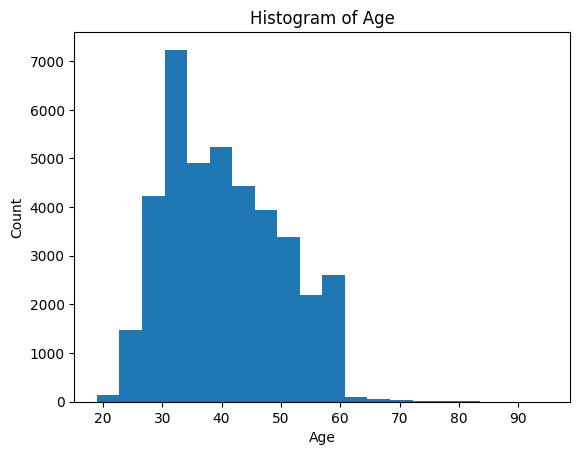

In [6]:
# Plot a histogram of the age variable
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

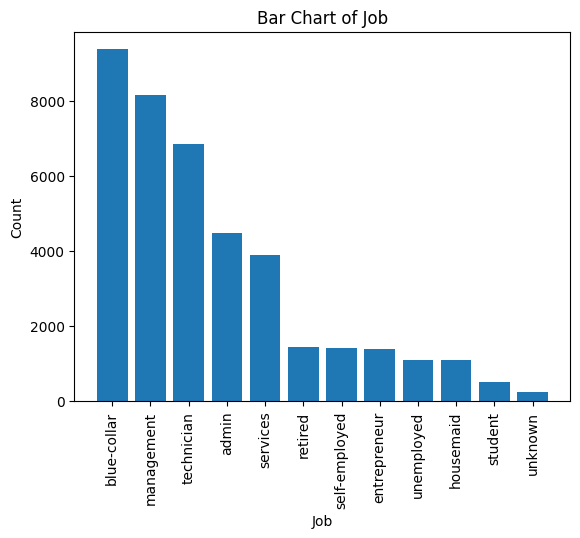

In [7]:
# Plot a bar chart of the job variable
plt.bar(df['job'].value_counts().index, df['job'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar Chart of Job')
plt.show()


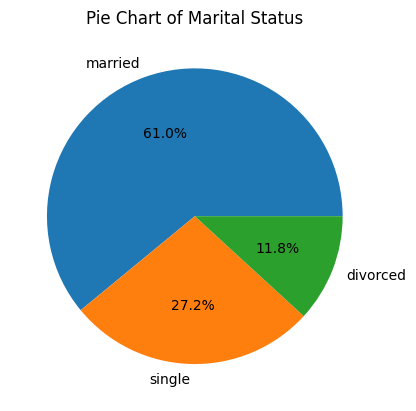

In [8]:
# Plot a pie chart of the marital status variable
plt.pie(df['marital'].value_counts(), labels=df['marital'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Marital Status')
plt.show()

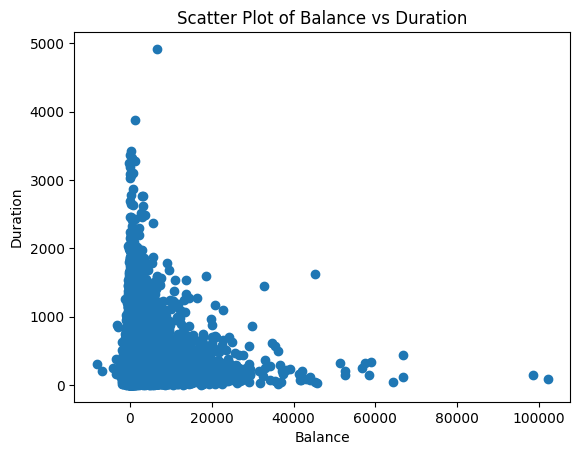

In [9]:
# Plot a scatter plot of balance vs duration
plt.scatter(df['balance'], df['duration'])
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Scatter Plot of Balance vs Duration')
plt.show()

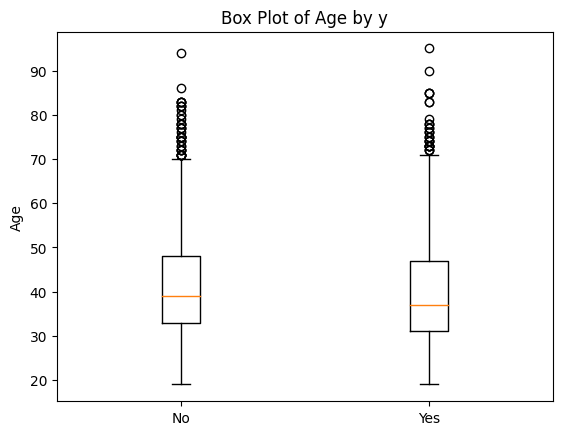

In [10]:
# Plot a box plot of age by y
plt.boxplot([df[df['y']=='no']['age'], df[df['y']=='yes']['age']])
plt.xticks([1, 2], ['No', 'Yes'])
plt.ylabel('Age')
plt.title('Box Plot of Age by y')
plt.show()

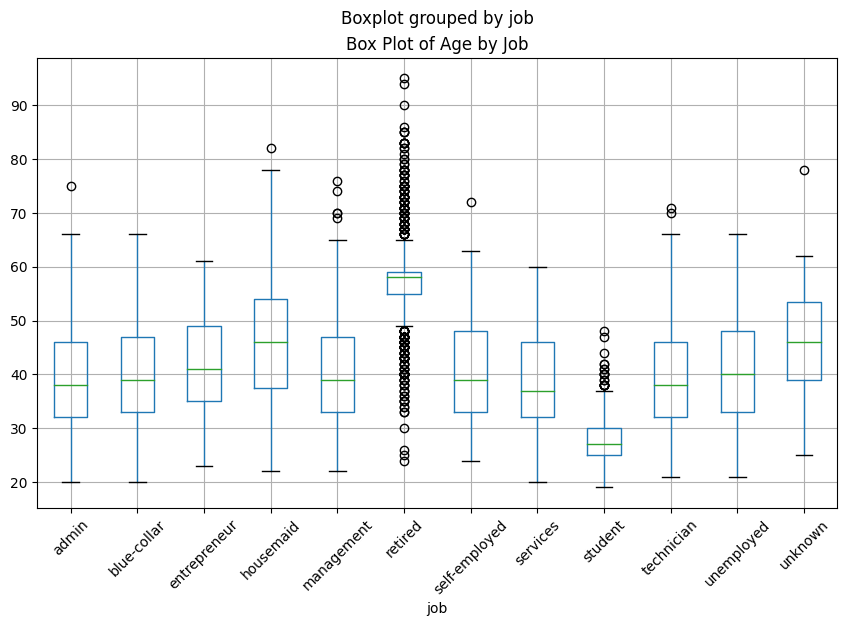

In [11]:
# Box plots of age by job
df.boxplot(column='age', by='job', figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Box Plot of Age by Job')
plt.show()

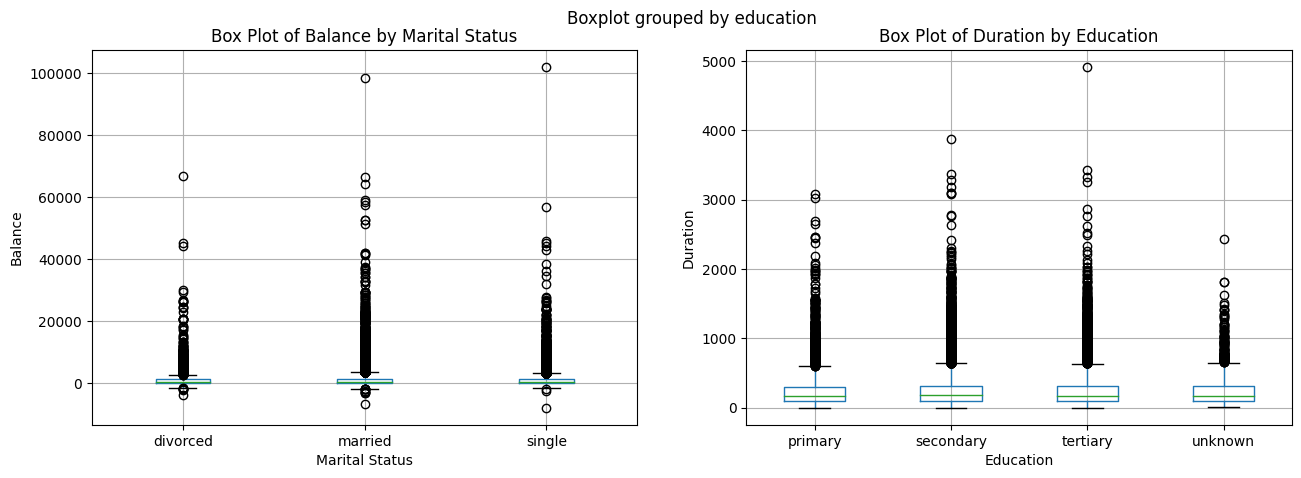

In [12]:
# Box plots of age by job, balance by marital status, and duration by education
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.boxplot(column='balance', by='marital', ax=axes[0])
axes[0].set_title('Box Plot of Balance by Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Balance')

df.boxplot(column='duration', by='education', ax=axes[1])
axes[1].set_title('Box Plot of Duration by Education')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Duration')

plt.show()

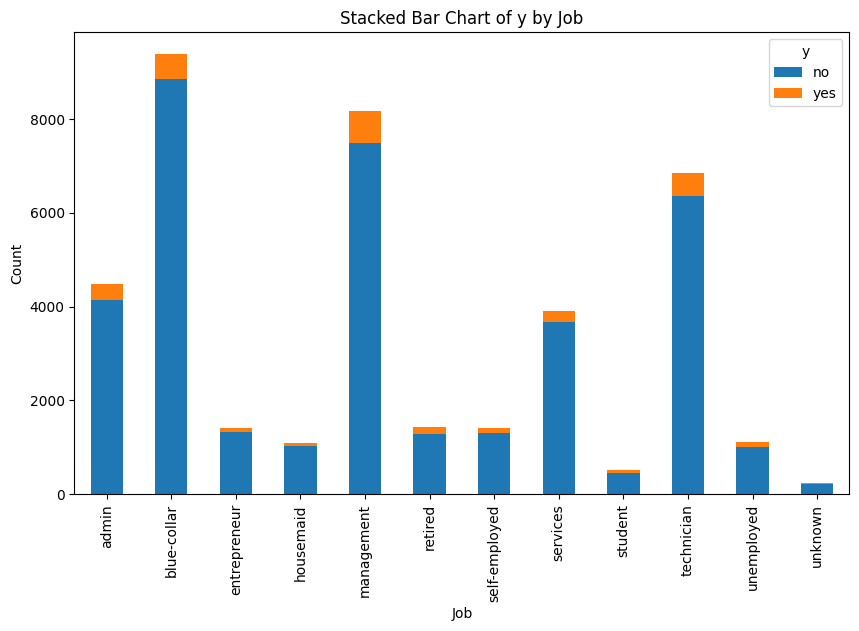

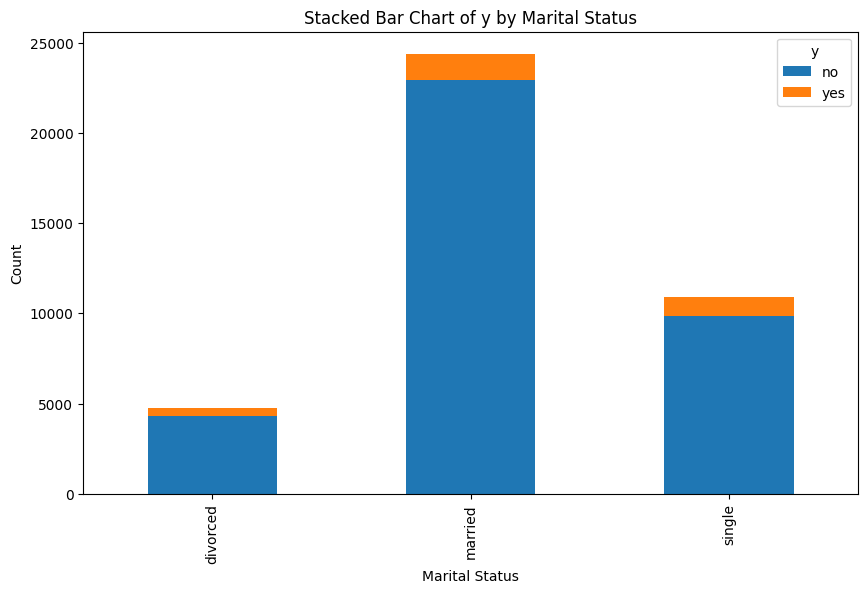

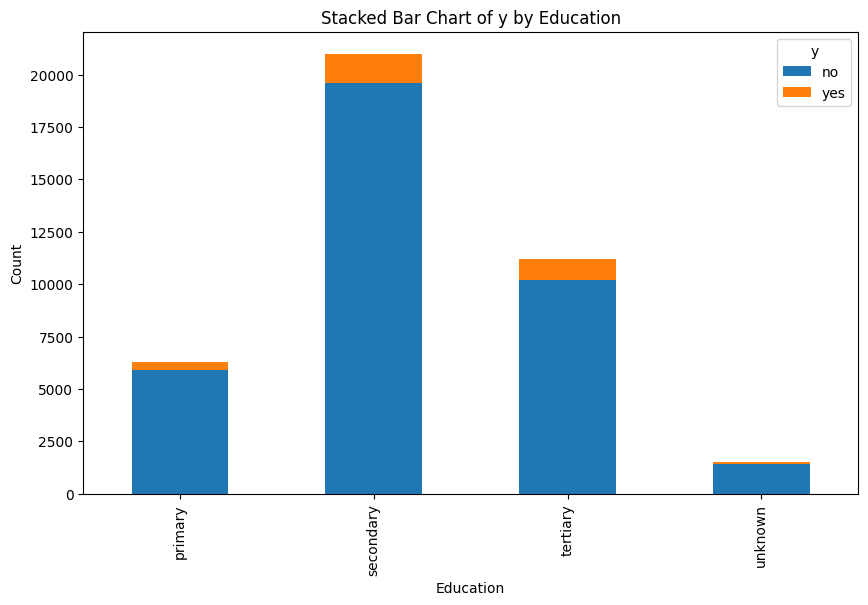

In [13]:
# Stacked bar chart of y by job
pd.crosstab(df.job, df.y).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Bar Chart of y by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

# Stacked bar chart of y by marital status
pd.crosstab(df.marital, df.y).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Bar Chart of y by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Stacked bar chart of y by education
pd.crosstab(df.education, df.y).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Bar Chart of y by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_20/2112417104.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


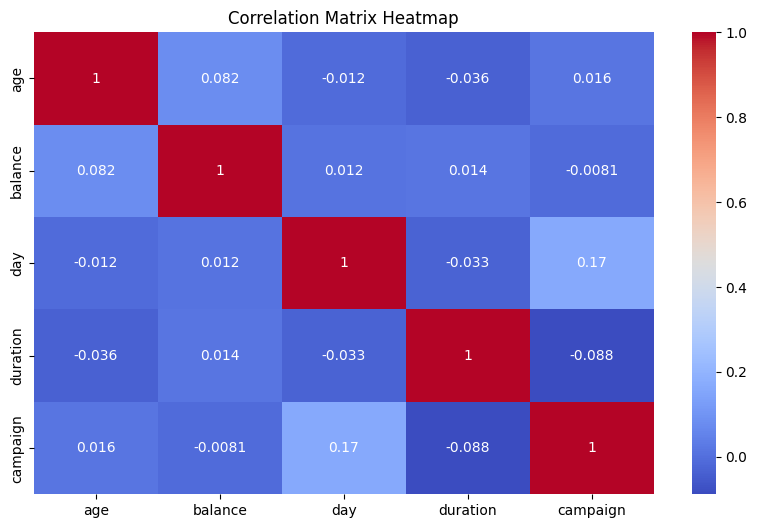

In [14]:
# Heatmap of correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

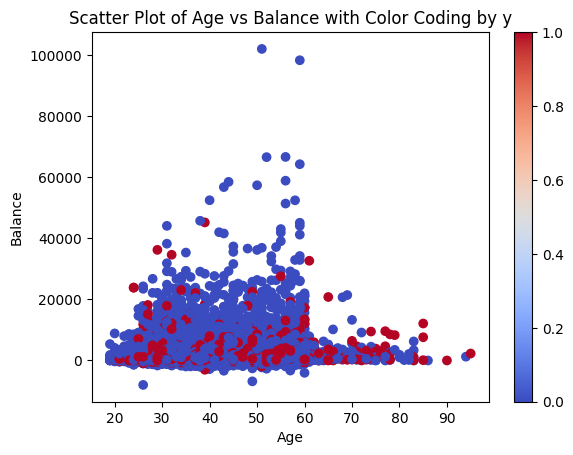

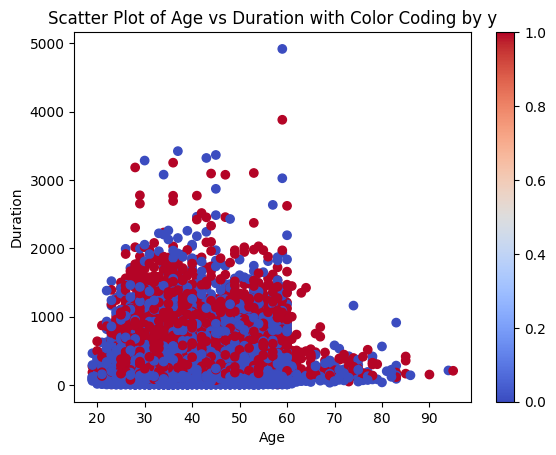

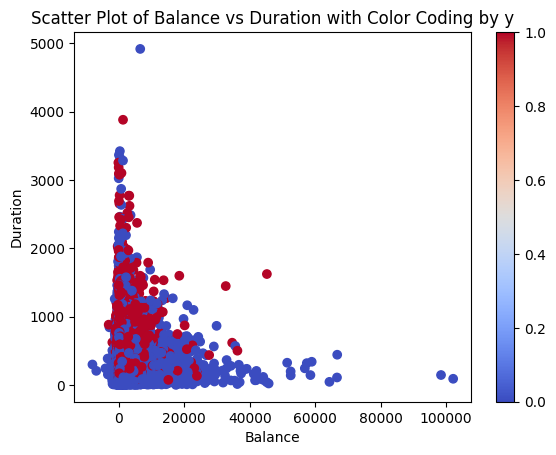

In [15]:
# Scatter plot of age vs balance with color coding by y
plt.scatter(df['age'], df['balance'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0), cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs Balance with Color Coding by y')
plt.colorbar()
plt.show()

# Scatter plot of age vs duration with color coding by y
plt.scatter(df['age'], df['duration'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0), cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Scatter Plot of Age vs Duration with Color Coding by y')
plt.colorbar()
plt.show()

# Scatter plot of balance vs duration with color coding by y
plt.scatter(df['balance'], df['duration'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0), cmap='coolwarm')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.title('Scatter Plot of Balance vs Duration with Color Coding by y')
plt.colorbar()
plt.show()

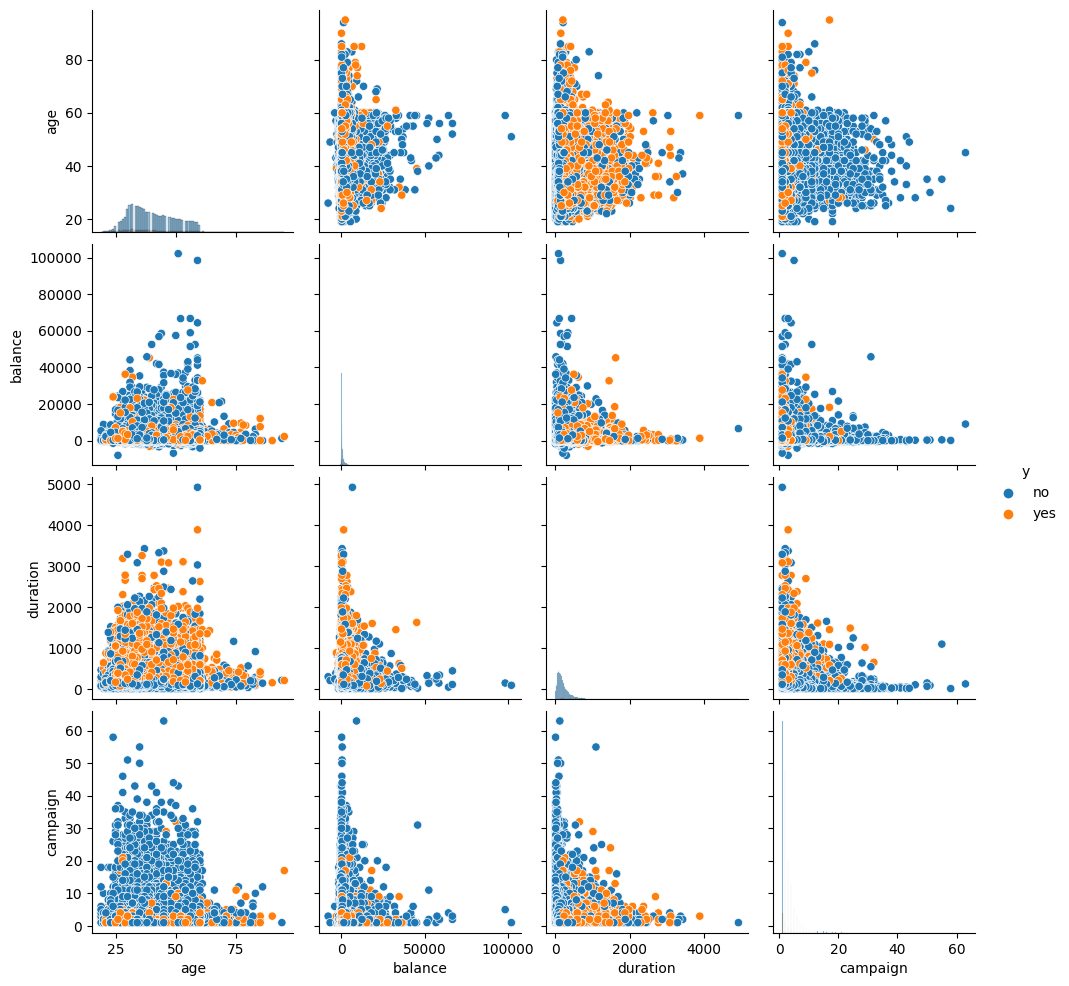

In [16]:
# Pair plot of numerical variables with color coding by y
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'y']], hue='y', diag_kind='hist')
plt.show()

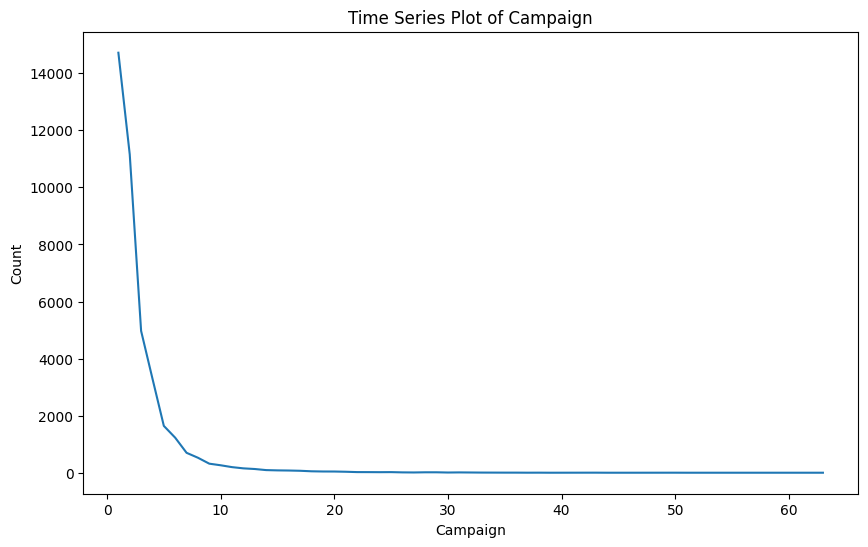

In [17]:
# Time series plot of campaign
df.groupby('campaign')['campaign'].count().plot(figsize=(10,6))
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Time Series Plot of Campaign')
plt.show()

**Converting categorical into numerical**

In [18]:


# Perform one-hot encoding on the categorical features
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month'])

# Drop the original categorical features
df_encoded.drop(['default', 'housing', 'loan'], axis=1, inplace=True)

# Convert the output variable to numerical
df_encoded['y'] = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Print the first few rows of the encoded dataset
print(df_encoded.head())

   age  balance  day  duration  campaign  y  job_admin  job_blue-collar  \
0   58     2143    5       261         1  0          0                0   
1   44       29    5       151         1  0          0                0   
2   33        2    5        76         1  0          0                0   
3   47     1506    5        92         1  0          0                1   
4   33        1    5       198         1  0          0                0   

   job_entrepreneur  job_housemaid  ...  month_aug  month_dec  month_feb  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          0   
2                 1              0  ...          0          0          0   
3                 0              0  ...          0          0          0   
4                 0              0  ...          0          0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          

**Finding Coorelation**


In [19]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Find the absolute values of the correlation coefficients with respect to 'y'
corr_abs = corr_matrix['y'].abs()

# Find the feature with the highest correlation coefficient with respect to 'y'
most_correlated = corr_abs.drop('y').idxmax()

# Print the most correlated feature with respect to 'y'
print("The most correlated feature with respect to 'y' is:", most_correlated)


The most correlated feature with respect to 'y' is: duration


**Model Trainig and Evaluation**

**Logistec Regression**

Accuracy: 0.936375
Average accuracy: 0.7036
Standard deviation: 0.2858867280060409
Lower bound: 0.4177132719939591
Upper bound: 0.9894867280060409


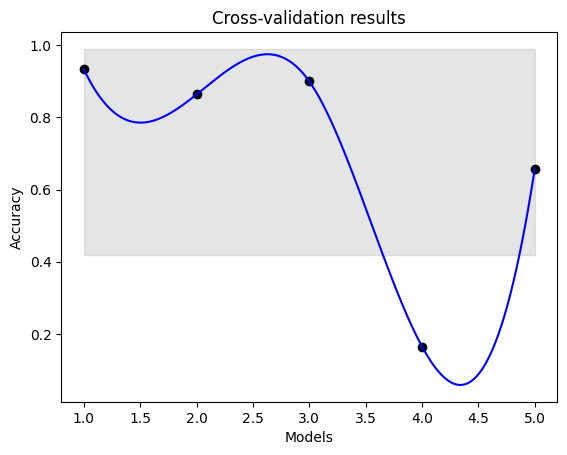

In [20]:
# Define the features and target variable
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(logreg, X, y, cv=5)
average_accuracy = scores.mean()
std_deviation = scores.std()
print("Average accuracy:", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

**Random Forest**

Accuracy: 0.93675
Average accuracy: 0.40465
Standard deviation: 0.2858867280060409
Lower bound: 0.11876327199395909
Upper bound: 0.6905367280060409


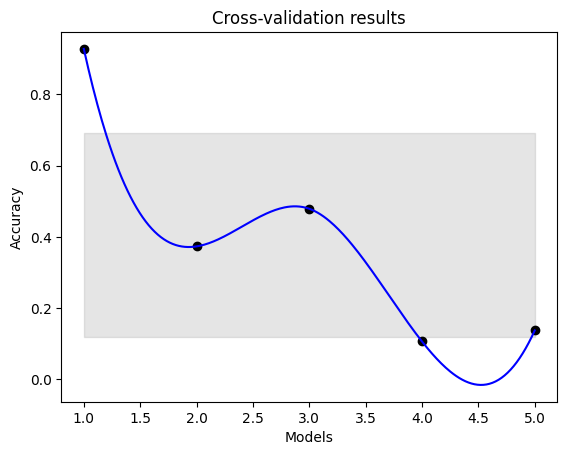

In [21]:
# Define the features and target variable
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(rf, X, y, cv=5)
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

**XGBOOST**

Accuracy: 0.937125
5 CV average_accuracy : 0.667575
Standard deviation: 0.24137349947746956
Lower bound: 0.4262015005225305
Upper bound: 0.9089484994774696


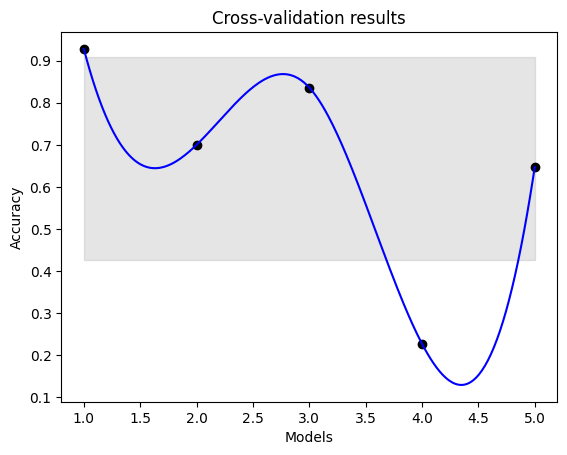

In [22]:
import xgboost as xgb

# Define the features and target variable
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(xgb_clf, X, y, cv=5)
average_accuracy = scores.mean()
std_deviation = scores.std()
print("5 CV average_accuracy :", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter



# Separate features and labels
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Instantiate SMOTE object
smote = SMOTE()

# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and labels into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
resampled_df.columns = df_encoded.columns

print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 37104, 1: 2896})
Class distribution after SMOTE: Counter({0: 37104, 1: 37104})


**Know we will repeate the same Machine learning models with the balanced data:**

**Logistic Regression**

Accuracy: 0.9899609217086646
5 CV Average Accuracy : 0.9794225791548797
Standard deviation: 0.24137349947746956
Lower bound: 0.7380490796774102
Upper bound: 1.2207960786323493


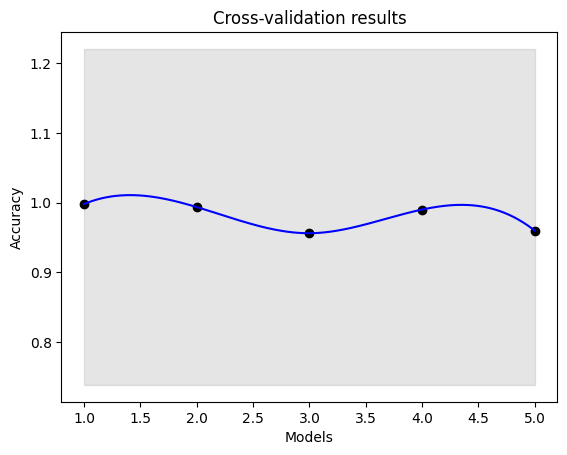

In [24]:
# Define the features and target variable
X = resampled_df.drop('y', axis=1)
y = resampled_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(logreg, X, y, cv=5)
average_accuracy = scores.mean()
print("5 CV Average Accuracy :", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

**Random Forest**

Accuracy: 0.989489287158065
5 CV Average Accuracy : 0.7934360148944759
Standard deviation: 0.24137349947746956
Lower bound: 0.5520625154170063
Upper bound: 1.0348095143719456


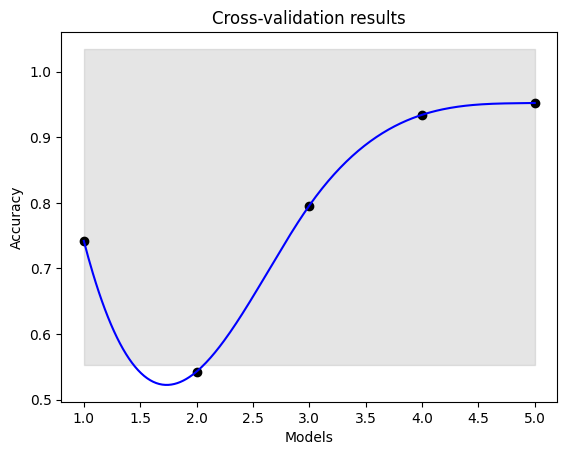

In [25]:
# Define the features and target variable
X = resampled_df.drop('y', axis=1)
y = resampled_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(rf, X, y, cv=5)
average_accuracy = scores.mean()
print("5 CV Average Accuracy :", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()

**XGBOOST**

Accuracy: 0.9799892197817006
5 CV Average Accuracy : 0.9637371808419845
Standard deviation: 0.016002245946583987
Lower bound: 0.9477349348954005
Upper bound: 0.9797394267885684


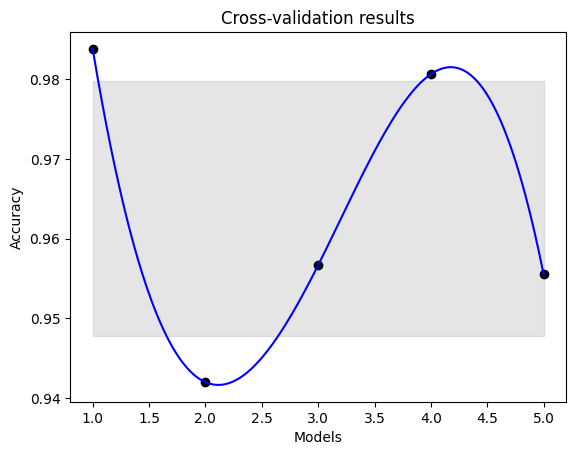

In [26]:
import xgboost as xgb

# Define the features and target variable
X = resampled_df.drop('y', axis=1)
y = resampled_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's accuracy using cross-validation
scores = cross_val_score(xgb_clf, X, y, cv=5)
average_accuracy = scores.mean()
std_deviation = scores.std()
print("5 CV Average Accuracy :", average_accuracy)
print("Standard deviation:", std_deviation)

lower_bound = average_accuracy - std_deviation
upper_bound = average_accuracy + std_deviation

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Interpolate the scores to create a smooth curve
x_new = np.linspace(1, len(scores), 300)
spl = make_interp_spline(np.arange(1, len(scores) + 1), scores, k=3)
y_new = spl(x_new)

plt.plot(x_new, y_new, color='blue')
plt.fill_between(np.arange(1, len(scores) + 1), average_accuracy - std_deviation, average_accuracy + std_deviation, alpha=0.2, color='gray')
plt.scatter(np.arange(1, len(scores) + 1), scores, color='black')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-validation results')
plt.show()